In [64]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plat
import palettable as pal
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

Populating the interactive namespace from numpy and matplotlib


/Users/johnsolk/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Text', 'sample', 'display', 'repeat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
!ls -lah

total 1296
drwxr-xr-x   9 johnsolk  staff   288B May 24 13:54 .
drwxr-xr-x  14 johnsolk  staff   448B May 22 10:51 ..
drwxr-xr-x   3 johnsolk  staff    96B May 22 10:56 .ipynb_checkpoints
-rw-r--r--   1 johnsolk  staff   545K May 24 13:54 Figures_ICBF_poster_2018.ipynb
-rw-r--r--@  1 johnsolk  staff    19K May 24 09:52 busco_all.pdf
-rw-r--r--@  1 johnsolk  staff    66K May 23 15:31 busco_all.png
-rw-r--r--   1 johnsolk  staff   2.3K May 23 12:18 busco_scores_v3_actino.csv
-rw-r--r--   1 johnsolk  staff   2.1K May 22 11:40 busco_scores_v3_euk.csv
-rw-r--r--   1 johnsolk  staff   2.2K May 22 11:40 busco_scores_v3_met.csv


In [3]:
BUSCO_met_file = "busco_scores_v3_met.csv"
BUSCO_euk_file = "busco_scores_v3_euk.csv"
BUSCO_actino_file = "busco_scores_v3_actino.csv"
BUSCO_met = pd.read_csv(BUSCO_met_file)
BUSCO_euk = pd.read_csv(BUSCO_euk_file)
BUSCO_actino = pd.read_csv(BUSCO_actino_file)

In [4]:
BUSCO_euk.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %',
       'CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc',
       'Missing_perc']
BUSCO_met.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %',
       'CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc',
       'Missing_perc']
BUSCO_actino.columns = ['species transcriptome', 'Complete', 'Complete/Single-Copy', 'Complete/Duplicated',
       'Fragmented', 'Missing', 'Total', 'Complete BUSCO %',
       'CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc',
       'Missing_perc']
BUSCO_met['BUSCO Lineage Database'] = 'Metazoa'
BUSCO_euk['BUSCO Lineage Database'] = 'Eukaryota'
BUSCO_actino['BUSCO Lineage Database'] = 'Actinopterygii'

frames = [BUSCO_met,BUSCO_euk,BUSCO_actino]
BUSCO = pd.concat(frames)

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


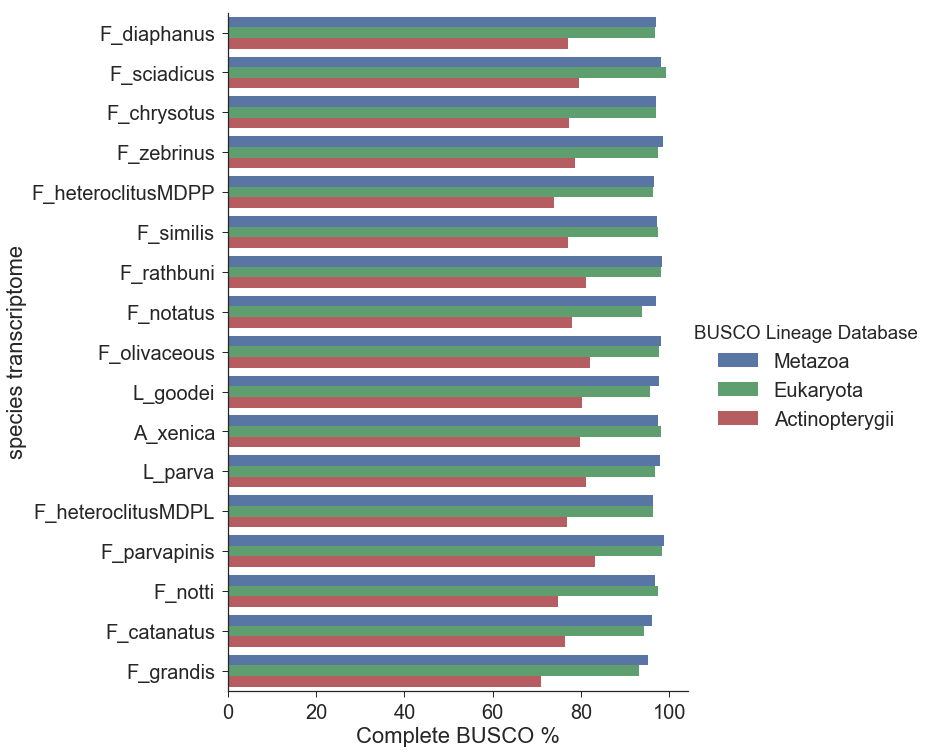

In [69]:
sns.set_style('ticks')
#sns.set(font_scale=2)
a = sns.factorplot(x="Complete BUSCO %", y="species transcriptome", hue="BUSCO Lineage Database", data=BUSCO, kind="bar", orient='h',size=11);
sns.despine()
sns.set_style("white")
a.savefig('busco_all.pNG')

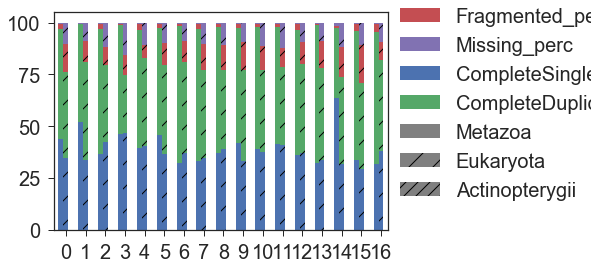

In [8]:
def plot_clustered_stacked(dfall, labels=None, H="/", **kwargs):
    """Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
labels is a list of the names of the dataframe, used for the legend
title is a string for the title of the plot
H is the hatch used for identification of the different dataframe"""

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.01, 0.5])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.01, 0.1])  
    axe.add_artist(l1)
    return axe

BUSCO_met_short = BUSCO_met[['species transcriptome','CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc','Missing_perc','BUSCO Lineage Database']]
BUSCO_euk_short = BUSCO_euk[['species transcriptome','CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc','Missing_perc','BUSCO Lineage Database']]
BUSCO_actino_short = BUSCO_actino[['species transcriptome','CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc','Missing_perc','BUSCO Lineage Database']]

BUSCO_met_short.set_index('species transcriptome')
BUSCO_euk_short.set_index('species transcriptome')
BUSCO_actino_short.set_index('species transcriptome')

plot_clustered_stacked([BUSCO_met_short, BUSCO_euk_short, BUSCO_actino_short],["Metazoa", "Eukaryota", "Actinopterygii"]);

In [23]:
df1 = BUSCO_met[['species transcriptome','CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc','Missing_perc','BUSCO Lineage Database']]
df2 = BUSCO_euk[['species transcriptome','CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc','Missing_perc','BUSCO Lineage Database']]
df3 = BUSCO_actino[['species transcriptome','CompleteSingleCopy_perc', 'CompleteDuplicated_perc', 'Fragmented_perc','Missing_perc','BUSCO Lineage Database']]
dfall = pd.concat([pd.melt(i.reset_index(),
                           id_vars=["species transcriptome", "index","BUSCO Lineage Database"]) # transform in tidy format each df
                   for i in [df1, df2, df3]],
                   ignore_index=True)

In [24]:
#dfall

In [29]:
dfall.set_index(["species transcriptome", "index", "variable","BUSCO Lineage Database"], inplace=True)
dfall["BUSCO"] = dfall.groupby(level=["species transcriptome", "index","BUSCO Lineage Database"]).cumsum()
dfall.reset_index(inplace=True)

In [33]:
dfall.head(20)

,species transcriptome,index,variable,BUSCO Lineage Database,value,BUSCO
0,F_diaphanus,0,CompleteSingleCopy_perc,Metazoa,46.830266,46.830266
1,F_sciadicus,1,CompleteSingleCopy_perc,Metazoa,48.773006,48.773006
2,F_chrysotus,2,CompleteSingleCopy_perc,Metazoa,38.036810,38.036810
3,F_zebrinus,3,CompleteSingleCopy_perc,Metazoa,46.932515,46.932515
4,F_heteroclitusMDPP,4,CompleteSingleCopy_perc,Metazoa,37.627812,37.627812
5,F_similis,5,CompleteSingleCopy_perc,Metazoa,44.989775,44.989775
6,F_rathbuni,6,CompleteSingleCopy_perc,Metazoa,34.560327,34.560327
7,F_notatus,7,CompleteSingleCopy_perc,Metazoa,35.582822,35.582822
8,F_olivaceous,8,CompleteSingleCopy_perc,Metazoa,38.957055,38.957055
9,L_goodei,9,CompleteSingleCopy_perc,Metazoa,42.229039,42.229039


/Users/johnsolk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


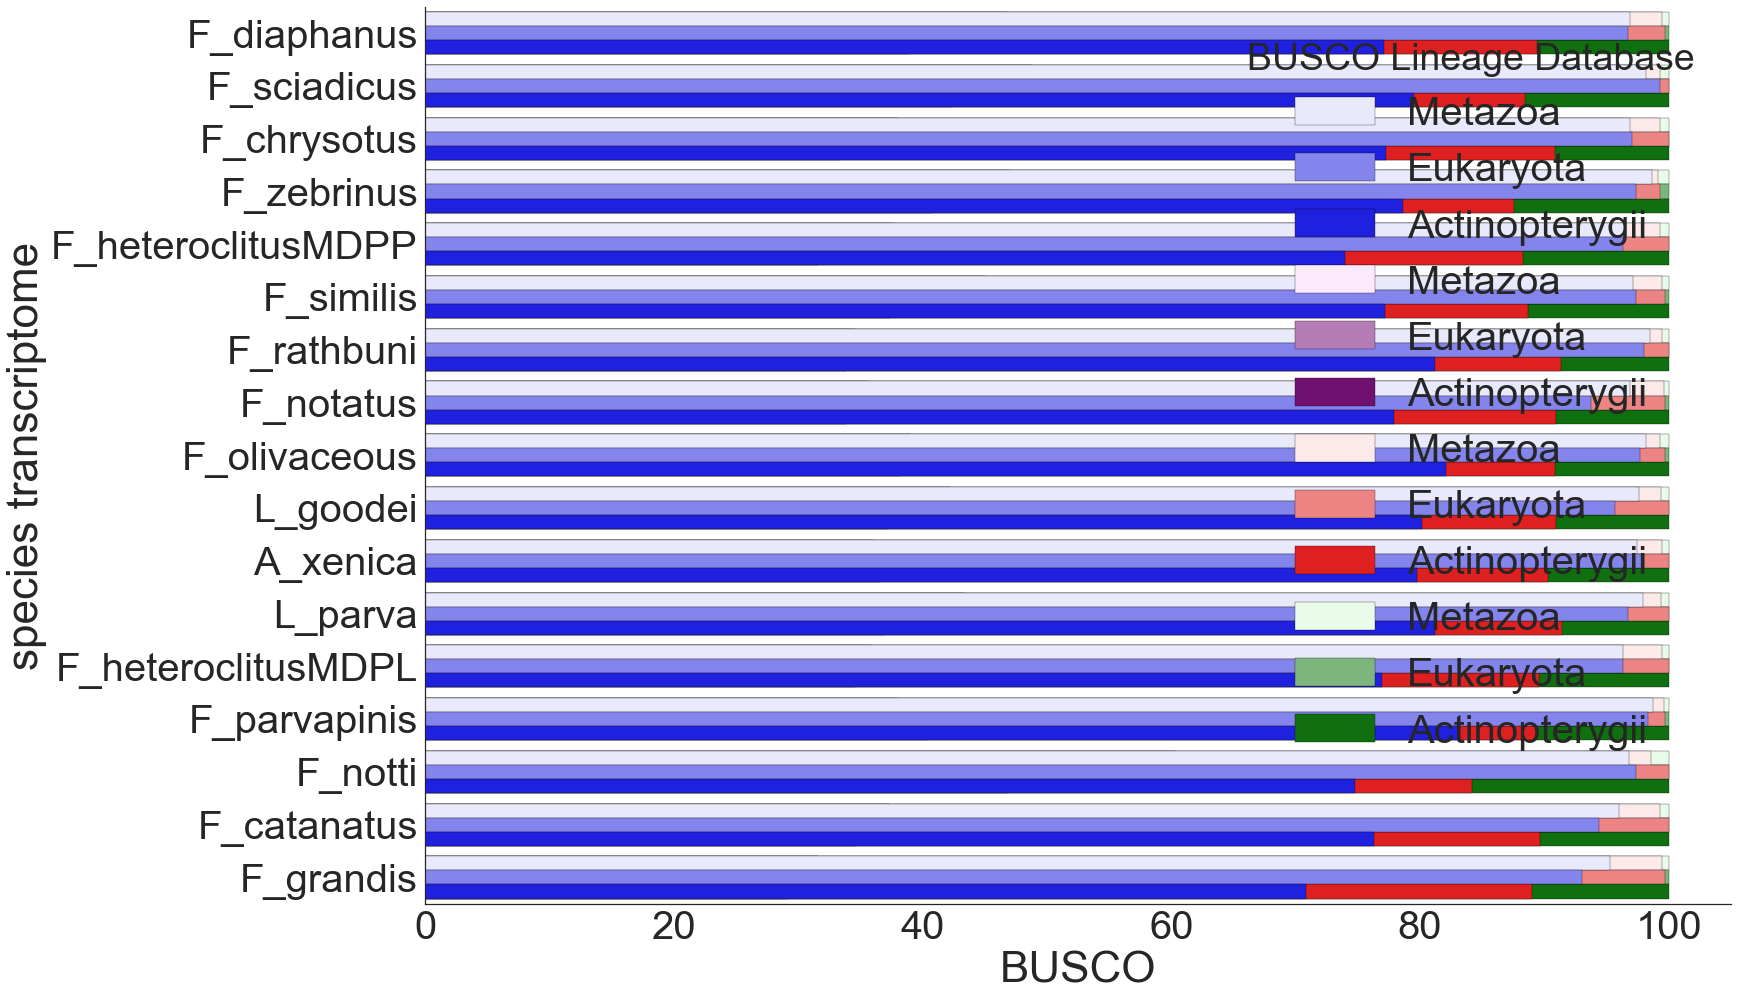

In [50]:
c = ["blue", "purple", "red", "green"]


fig, ax = pyplot.subplots(figsize=(23.4, 16.5))
sns.set(font_scale=4)
for i, g in enumerate(dfall.groupby("variable")):
    #print(i)
    #print(g[1])
    ax = sns.barplot(data=g[1],
                     y="species transcriptome",
                     x="BUSCO",
                     hue="BUSCO Lineage Database",
                     color=c[i],
                     zorder=-i, # so first bars stay on top
                     edgecolor="k")
#ax.legend_.remove() # remove the redundant legends
sns.despine()
sns.set_style("white")

In [11]:
#pd.set_option('display.max_rows',500)
#dfall

Text(0.5,0,'species')

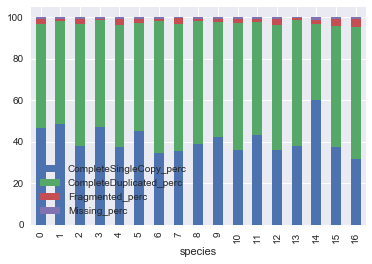

In [13]:
sns.set()
pl = df1.plot(kind='bar', stacked=True,)
pl.set_xlabel('species')